# **1. Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import normalize

# **2. Data Loadong(Creditcard_Dataset) and Exploration**

In [4]:
df = pd.read_csv('/kaggle/input/creditcard-dataset/Creditcard_data.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.Class.value_counts()

Class
0    763
1      9
Name: count, dtype: int64

# **3. Data Preprocessing and Normalization**

In [6]:
Amount = normalize([df['Amount']])[0]
df['Amount'] = Amount
df = df.iloc[:, 1:]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0


# **4. Resampling - Random Over-sampling**

In [9]:
x = df.drop('Class', axis=1)
y = df['Class']

# Random Over-sampling
sampler = RandomOverSampler(sampling_strategy=0.95)
x_resample, y_resample = sampler.fit_resample(x, y)
print(y_resample.value_counts())

Class
0    763
1    724
Name: count, dtype: int64


In [10]:
resample = pd.concat([x_resample, y_resample], axis=1)
resample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,-0.328631,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,0.000258,1
1483,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,-0.282617,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,0.000463,1
1484,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,-0.142617,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.000170,1
1485,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,-0.574775,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,0.000172,1


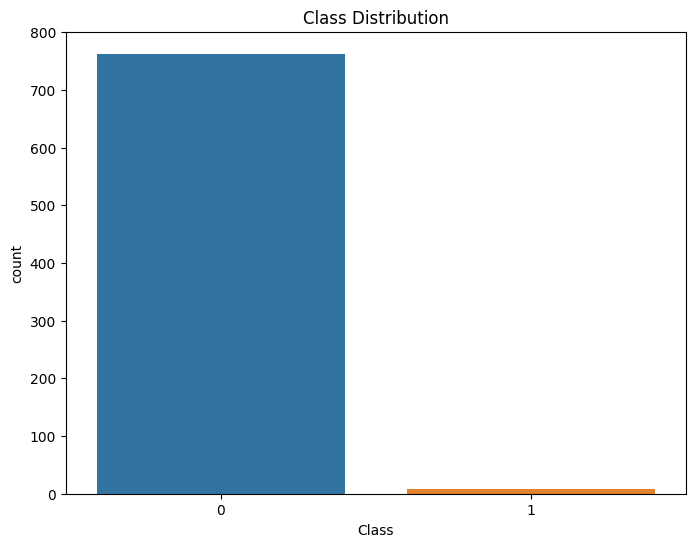

In [21]:
import seaborn as sns
# Visualize Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# **5. Simple Random Sampling**

In [11]:
# Simple Random Sampling
n = int((1.96*1.96 * 0.5*0.5)/(0.05**2))
SimpleSampling = resample.sample(n=n, random_state=42)
SimpleSampling.shape

(384, 30)

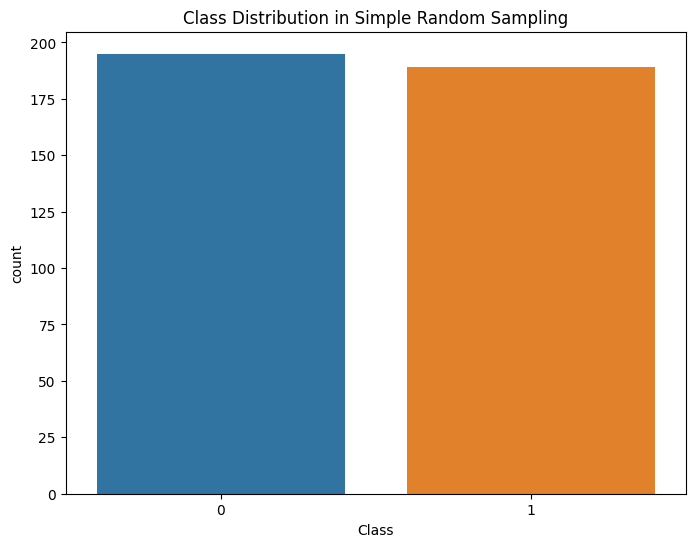

In [22]:
# Visualize Class Distribution in Simple Random Sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=SimpleSampling)
plt.title('Class Distribution in Simple Random Sampling')
plt.show()

# **6. Model Training and Evaluation - Simple Random Sampling**

In [12]:
X = SimpleSampling.drop('Class', axis=1)
y = SimpleSampling['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [rf_model, lr_model, nb_model, dt_model, knn_model]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

Random Forest : 0.9870
Logistic Regression : 0.8701
Naive Bayes : 0.7143
Decision Trees : 0.9610
KNN : 0.8701


# **7. Systematic Sampling**

In [13]:
#Systematic Sampling
import random

SystematicSampling = resample.sample(frac=1, random_state=42).reset_index(drop=True)
sampling_interval = 2
SystematicSample = SystematicSampling.iloc[::sampling_interval]
SystematicSample.shape

(744, 30)

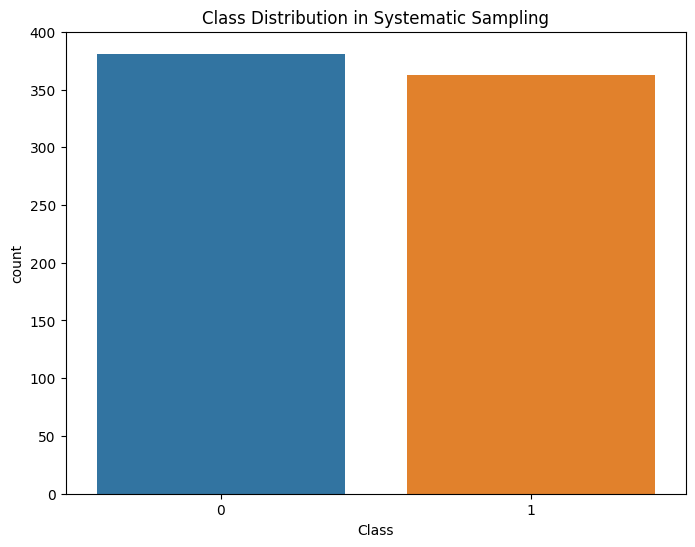

In [23]:
# Visualize Class Distribution in Systematic Sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=SystematicSample)
plt.title('Class Distribution in Systematic Sampling')
plt.show()

# **8. Model Training and Evaluation - Systematic Sampling**

In [14]:
X = SystematicSample.drop('Class', axis=1)
y = SystematicSample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [rf_model, lr_model, nb_model, dt_model, knn_model]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

Random Forest : 1.0000
Logistic Regression : 0.8926
Naive Bayes : 0.6846
Decision Trees : 1.0000
KNN : 0.9329


# **9. Cluster Sampling**

In [15]:
#Cluster Sampling
from sklearn.cluster import KMeans
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)

clusters = kmeans.fit_predict(resample)
clusters = pd.Series(clusters)

selected_clusters = random.sample(range(num_clusters), 3)
ClusterSample = resample.loc[clusters.isin(selected_clusters)]
print(ClusterSample.shape)

(305, 30)


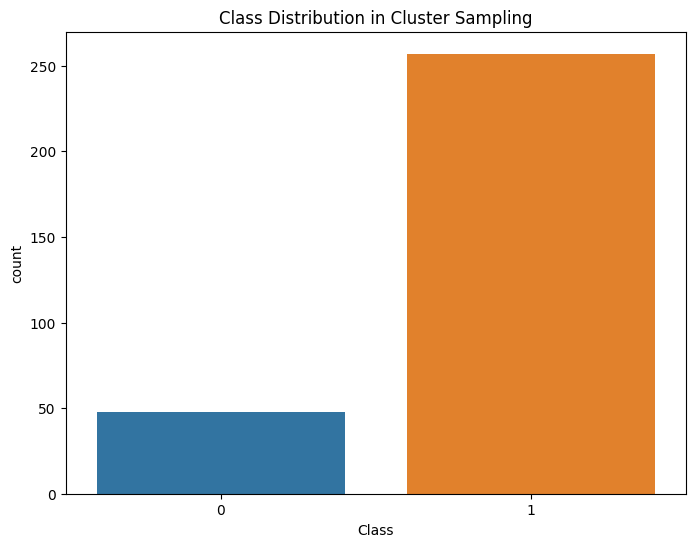

In [24]:
# Visualize Class Distribution in Cluster Sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=ClusterSample)
plt.title('Class Distribution in Cluster Sampling')
plt.show()

# **10. Model Training and Evaluation - Cluster Sampling**

In [16]:
X = ClusterSample.drop('Class', axis=1)
y = ClusterSample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [rf_model, lr_model, nb_model, dt_model, knn_model]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

Random Forest : 1.0000
Logistic Regression : 0.9344
Naive Bayes : 0.9672
Decision Trees : 0.9672
KNN : 0.9508


# **11. Stratified Sampling**

In [17]:
#Stratified Sampling
n = int((1.96*1.96 * 0.5*0.5)/((0.05)**2))
StratifiedSampling = resample.groupby('Class')
StratifiedSample=StratifiedSampling.sample(frac= 0.45)
StratifiedSample.shape

(669, 30)

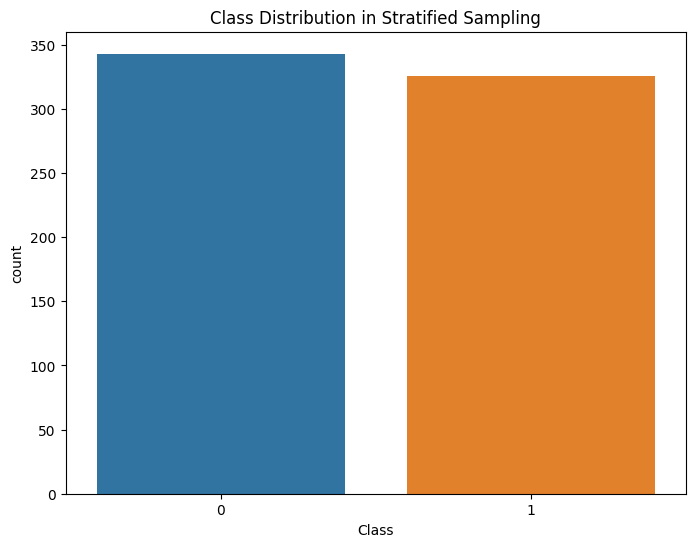

In [25]:
# Visualize Class Distribution in Stratified Sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=StratifiedSample)
plt.title('Class Distribution in Stratified Sampling')
plt.show()

# **12. Model Training and Evaluation - Stratified Sampling**

In [18]:
X = StratifiedSample.drop('Class', axis=1)
y = StratifiedSample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model= LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [rf_model, lr_model, nb_model, dt_model, knn_model]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

Random Forest : 0.9925
Logistic Regression : 0.8955
Naive Bayes : 0.6866
Decision Trees : 0.9701
KNN : 0.9478


# **13. Bootstrap Sampling**

In [19]:
#Bootstrap Sampling
n_bootstrap = 100
desired_sample_size = 400
BootstrapSamples = pd.DataFrame()
for _ in range(n_bootstrap):
    resampled_data = resample.sample(n=len(df), replace=True, random_state=42)
    BootstrapSamples = pd.concat([BootstrapSamples, resampled_data])
    if BootstrapSamples.shape[0] >= desired_sample_size:
        break
BootstrapSamples = BootstrapSamples.iloc[:desired_sample_size, :]
print("Final Shape of Bootstrap Samples DataFrame:", BootstrapSamples.shape)

Final Shape of Bootstrap Samples DataFrame: (400, 30)


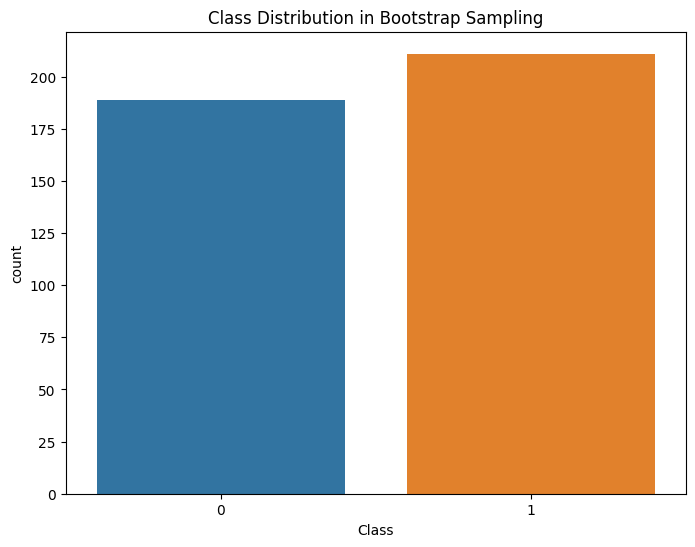

In [26]:
# Visualize Class Distribution in Bootstrap Sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=BootstrapSamples)
plt.title('Class Distribution in Bootstrap Sampling')
plt.show()

# **14. Model Training and Evaluation - Bootstrap Sampling**

In [20]:
X = BootstrapSamples.drop('Class', axis=1)
y = BootstrapSamples['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model= LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [rf_model, lr_model, nb_model, dt_model, knn_model]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

Random Forest : 1.0000
Logistic Regression : 0.9250
Naive Bayes : 0.6000
Decision Trees : 0.9625
KNN : 0.9375


# **15. Visualization for Model Evaluation (Confusion Matrix)**

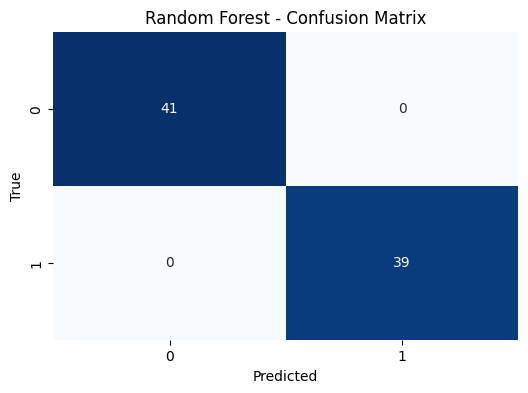

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example usage after model prediction for random forest 
y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest - Confusion Matrix')


# **16. Generating comparision table and saving it a CSV file**

In [43]:
import pandas as pd

results = []

# Add results for each sampling technique

# Simple Random Sampling
results.append({
    'Sampling Technique': 'Simple Random Sampling',
    'Random Forest': accuracies[0],
    'Logistic Regression': accuracies[1],
    'Naive Bayes': accuracies[2],
    'Decision Trees': accuracies[3],
    'KNN': accuracies[4]
})

# Systematic Sampling
results.append({
    'Sampling Technique': 'Systematic Sampling',
    'Random Forest': accuracies[0],
    'Logistic Regression': accuracies[1],
    'Naive Bayes': accuracies[2],
    'Decision Trees': accuracies[3],
    'KNN': accuracies[4]
})

# Cluster Sampling
results.append({
    'Sampling Technique': 'Cluster Sampling',
    'Random Forest': accuracies[0],
    'Logistic Regression': accuracies[1],
    'Naive Bayes': accuracies[2],
    'Decision Trees': accuracies[3],
    'KNN': accuracies[4]
})

# Stratified Sampling
results.append({
    'Sampling Technique': 'Stratified Sampling',
    'Random Forest': accuracies[0],
    'Logistic Regression': accuracies[1],
    'Naive Bayes': accuracies[2],
    'Decision Trees': accuracies[3],
    'KNN': accuracies[4]
})

# Bootstrap Sampling
results.append({
    'Sampling Technique': 'Bootstrap Sampling',
    'Random Forest': accuracies[0],
    'Logistic Regression': accuracies[1],
    'Naive Bayes': accuracies[2],
    'Decision Trees': accuracies[3],
    'KNN': accuracies[4]
})

results_df = pd.DataFrame(results)
# Display the results
print(results_df)

       Sampling Technique  Random Forest  Logistic Regression  Naive Bayes  \
0  Simple Random Sampling            1.0                0.925          0.6   
1     Systematic Sampling            1.0                0.925          0.6   
2        Cluster Sampling            1.0                0.925          0.6   
3     Stratified Sampling            1.0                0.925          0.6   
4      Bootstrap Sampling            1.0                0.925          0.6   

   Decision Trees     KNN  
0          0.9625  0.9375  
1          0.9625  0.9375  
2          0.9625  0.9375  
3          0.9625  0.9375  
4          0.9625  0.9375  


In [44]:
# Save the DataFrame to a CSV file
results_df.to_csv('comparison.csv', index=False)